# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alotau
City not found. Skipping...
Processing Record 2 of Set 1 | nadi
Processing Record 3 of Set 1 | nouadhibou
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | fale old settlement
Processing Record 7 of Set 1 | atafu village
Processing Record 8 of Set 1 | sao vicente
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | hadibu
Processing Record 12 of Set 1 | kapa'a
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | tikhvin
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | kaluga
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | fort bragg
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | isafjordur
Processing Record 

Processing Record 39 of Set 4 | keflavik
Processing Record 40 of Set 4 | qingnian
Processing Record 41 of Set 4 | gadzhiyevo
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | elmendorf air force base
City not found. Skipping...
Processing Record 44 of Set 4 | stanley
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | talnakh
Processing Record 47 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 48 of Set 4 | magong
Processing Record 49 of Set 4 | emerald
Processing Record 0 of Set 5 | udachny
Processing Record 1 of Set 5 | neiafu
Processing Record 2 of Set 5 | ambodifotatra
Processing Record 3 of Set 5 | sisimiut
Processing Record 4 of Set 5 | tanjung pinang
Processing Record 5 of Set 5 | candelaria
Processing Record 6 of Set 5 | howrah
Processing Record 7 of Set 5 | nicoya
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | merizo village
Processing Record 10 of Set 5 | tralee
Processing Record 11 o

Processing Record 31 of Set 8 | jaru
Processing Record 32 of Set 8 | chernyshevskiy
Processing Record 33 of Set 8 | tolanaro
Processing Record 34 of Set 8 | gwadar
Processing Record 35 of Set 8 | xique xique
Processing Record 36 of Set 8 | boves
Processing Record 37 of Set 8 | malvan
Processing Record 38 of Set 8 | lerwick
Processing Record 39 of Set 8 | braidwood
Processing Record 40 of Set 8 | puerto aysen
Processing Record 41 of Set 8 | porto novo
Processing Record 42 of Set 8 | cuyo
Processing Record 43 of Set 8 | karkira
Processing Record 44 of Set 8 | port douglas
Processing Record 45 of Set 8 | ugoofaaru
Processing Record 46 of Set 8 | villa gesell
Processing Record 47 of Set 8 | haifa
Processing Record 48 of Set 8 | mamuju
Processing Record 49 of Set 8 | mazagao
Processing Record 0 of Set 9 | as sulayyil
Processing Record 1 of Set 9 | balurghat
Processing Record 2 of Set 9 | kingscliff
Processing Record 3 of Set 9 | lazaro cardenas
Processing Record 4 of Set 9 | mersing
Process

Processing Record 22 of Set 12 | alexandria
Processing Record 23 of Set 12 | guapo
Processing Record 24 of Set 12 | huntington
Processing Record 25 of Set 12 | tyuratam
Processing Record 26 of Set 12 | magdagachi
Processing Record 27 of Set 12 | hirara
Processing Record 28 of Set 12 | kalevala
Processing Record 29 of Set 12 | usogorsk
Processing Record 30 of Set 12 | karatau
Processing Record 31 of Set 12 | siwa oasis
Processing Record 32 of Set 12 | mejit
Processing Record 33 of Set 12 | sulejow
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nadi,-17.8000,177.4167,30.00,84,75,4.12,FJ,1707182807
1,nouadhibou,20.9310,-17.0347,21.99,33,0,6.69,MR,1707182885
2,nemuro,43.3236,145.5750,-7.00,70,69,5.15,JP,1707182885
3,whitehorse,60.7161,-135.0538,-19.57,92,100,1.54,CA,1707182778
4,fale old settlement,-9.3852,-171.2468,28.69,81,100,12.46,TK,1707182886


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nadi,-17.8000,177.4167,30.00,84,75,4.12,FJ,1707182807
1,nouadhibou,20.9310,-17.0347,21.99,33,0,6.69,MR,1707182885
2,nemuro,43.3236,145.5750,-7.00,70,69,5.15,JP,1707182885
3,whitehorse,60.7161,-135.0538,-19.57,92,100,1.54,CA,1707182778
4,fale old settlement,-9.3852,-171.2468,28.69,81,100,12.46,TK,1707182886


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

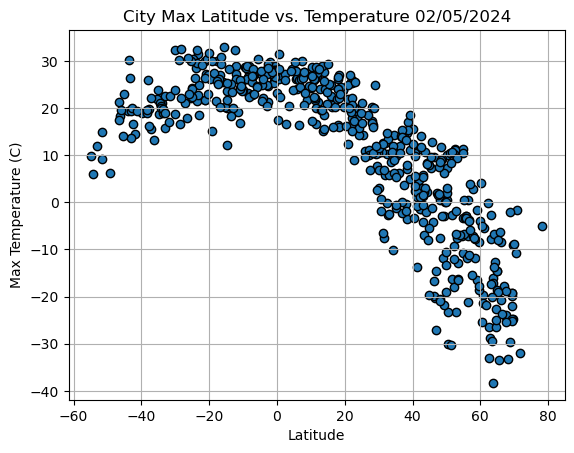

In [37]:
# Build scatter plot for latitude vs. temperature
lat_temp_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature " + time.strftime("%m/%d/%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

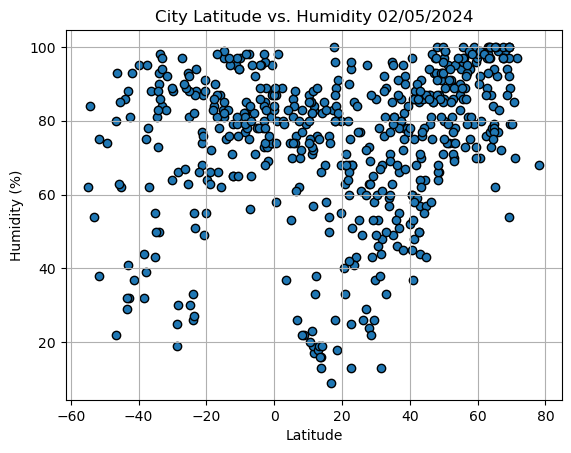

In [38]:
# Build the scatter plots for latitude vs. humidity
lat_hum_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + time.strftime("%m/%d/%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

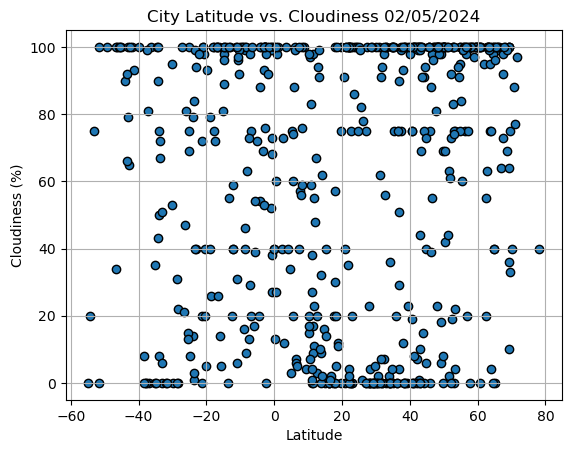

In [39]:
# Build the scatter plots for latitude vs. cloudiness
lat_cloud_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("%m/%d/%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

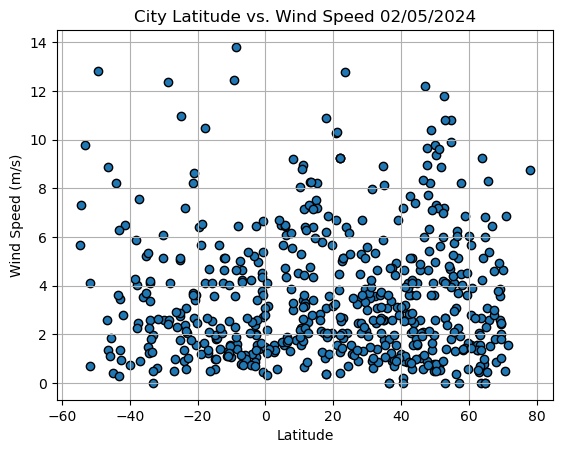

In [42]:
# Build the scatter plots for latitude vs. wind speed
lat_wind_scatter = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + time.strftime("%m/%d/%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [121]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values, label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nouadhibou,20.9310,-17.0347,21.99,33,0,6.69,MR,1707182885
2,nemuro,43.3236,145.5750,-7.00,70,69,5.15,JP,1707182885
3,whitehorse,60.7161,-135.0538,-19.57,92,100,1.54,CA,1707182778
9,hadibu,12.6500,54.0333,24.06,76,3,2.52,YE,1707182888
10,kapa'a,22.0752,-159.3190,25.99,67,100,9.26,US,1707182748


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nadi,-17.8000,177.4167,30.00,84,75,4.12,FJ,1707182807
4,fale old settlement,-9.3852,-171.2468,28.69,81,100,12.46,TK,1707182886
5,atafu village,-8.5421,-172.5159,28.10,82,100,13.81,TK,1707182886
6,sao vicente,-23.9631,-46.3919,28.48,26,14,1.34,BR,1707182887
7,avarua,-21.2078,-159.7750,30.03,74,20,8.23,CK,1707182840


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.865259447132489


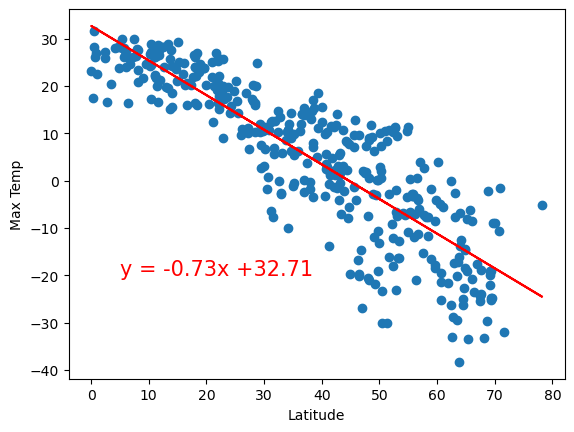

In [123]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (5,-20))

The r-value is: 0.5995556670688783


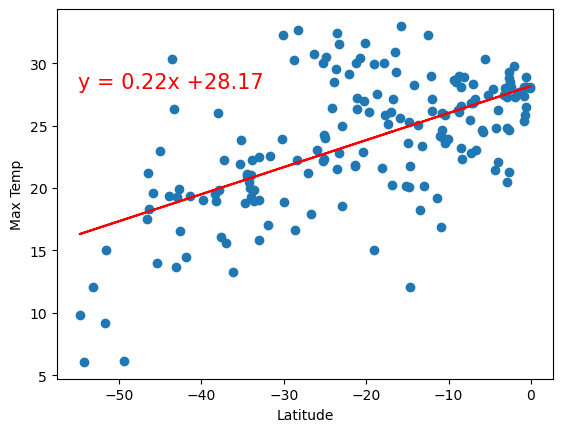

In [144]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (-55,28))

**Discussion about the linear relationship:** The northern hemisphere linear regression graph has a strong r-value which suggests that there is a strong negative correlation between latitude and temperature.  As the latitude increases, the temperature decreases.  This can be useful for predicting weather in the nothern hemisphere.

The southern hemisphere linear regresssion graph has a moderate r-value, which means it's a weaker indicator of positive correlation.  Some plots may lie along the linear regression line, but it is not as great of an indicator as it was shown in northern hemisphere graph.  There may be more variation in temperatures at latitudes in the souther hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


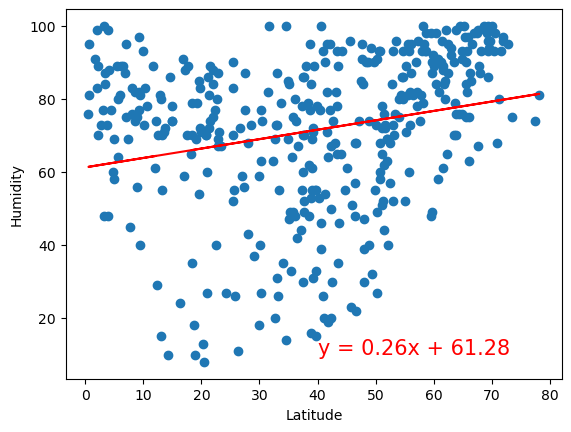

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, "Humidity", (40,15))

The r-value is: 0.33787758544697843


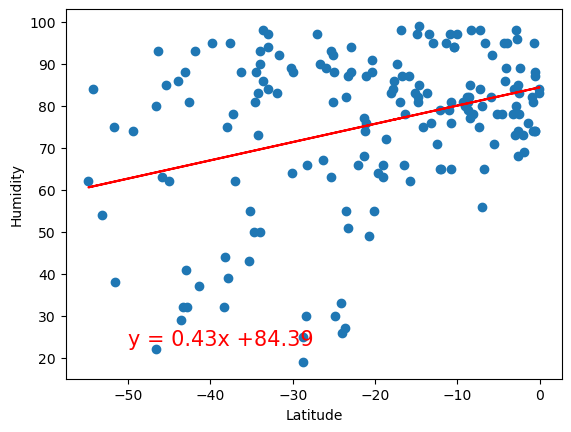

In [153]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, "Humidity", (-50,23))

**Discussion about the linear relationship:** The humidity in the northern hemisphere plot has a very small r-value.  There is no strong positive correlation between humidity and latitude in the northern hemisphere.  It can also be seen from the scatterplot itself that there are lots of points indicating a wide range of humidities at around similar latitudes.

The humidity plot for the southern hemisphere also has a weak r-value, although less weak than the northern hemisphere plot.  Similarly, it is not a good indicator or predictor of humidity vs latitude.  There is no strong positive correlation between humidity and latitude in either hemisphere graph, which means it is difficult to say that as latitude increases, so does humidity.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.318246906212235


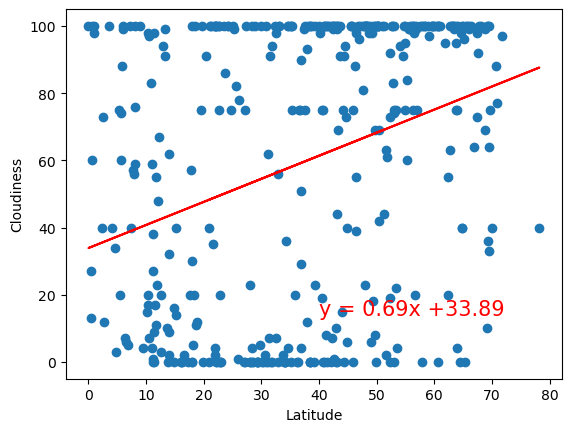

In [156]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness", (40,14))

The r-value is: 0.13768621854897792


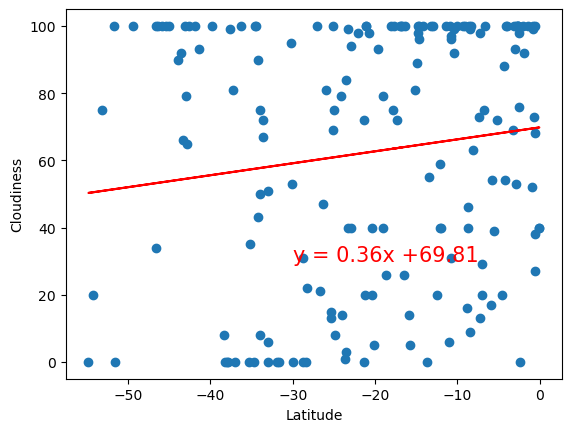

In [157]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** There is no significant positive correlation between cloudiness and the latitude for both the northern and southern hemisphere.  From the graphs, it is seen that there are many plots scattered all over and not very many lie along the regression line.  Also the r-values for both graphs are very weak, indicating there is no positive correlation between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.053463549312493405


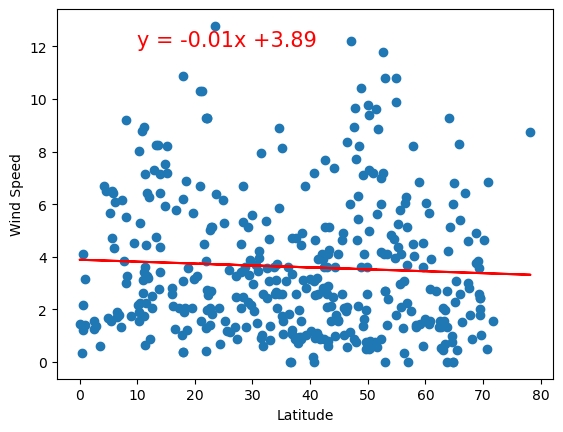

In [161]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: -0.13215375168833143


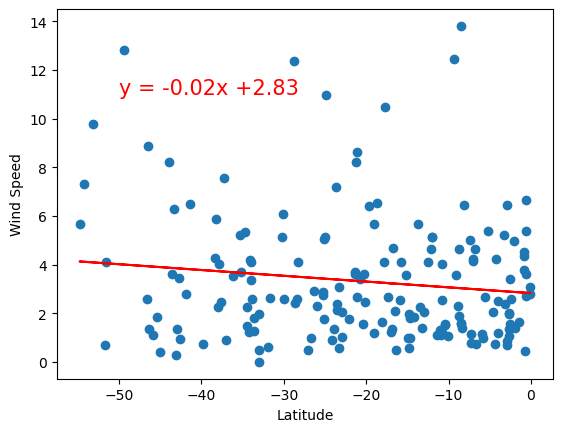

In [162]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed", (-50,11))

**Discussion about the linear relationship:** The r-value for wind speed vs latitude is very weak for both the northern and southern hemisphere graphs.  It is hard to determine what the wind speed will be like at a given latitude because there is a very weak correlation between the two.  